In [1]:
# import libraries  and packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# About features of Dataset

Podcast_Name (Type: string)
Description: Names of popular podcasts.
Example Values: "Tech Talk", "Health Hour", "Comedy Central"

Episode_Title (Type: string)
Description: Titles of the podcast episodes.
Example Values: "The Future of AI", "Meditation Tips", "Stand-Up Special"

Episode_Length (Type: float, minutes)
Description: Length of the episode in minutes.
Example Values: 5.0, 10.0, 30.0, 45.0, 60.0, 90.0

Genre (Type: string)
Description: Genre of the podcast episode.
Possible Values: "Technology", "Education", "Comedy", "Health", "True Crime", "Business", "Sports", "Lifestyle", "News", "Music"

Host_Popularity (Type: float, scale 0-100)
Description: A score indicating the popularity of the host.
Example Values: 50.0, 75.0, 90.0

Publication_Day (Type: string)
Description: Day of the week the episode was published.
Possible Values: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"

Publication_Time (Type: string)
Description: Time of the day the episode was published.
Possible Values: "Morning", "Afternoon", "Evening", "Night"

Guest_Popularity (Type: float, scale 0-100)
Description: A score indicating the popularity of the guest (if any).
Example Values: 20.0, 50.0, 85.0

Number_of_Ads (Type: int)
Description: Number of advertisements within the episode.
Example Values: 0, 1, 2, 3

Episode_Sentiment (Type: string)
Description: Sentiment of the episode's content.
Possible Values: "Positive", "Neutral", "Negative"

Listening_Time (Type: float, minutes)
Description: The actual average listening duration (target variable).
Example Values: 4.5, 8.0, 30.0, 60.0





In [2]:
#Load train dataset and gender_submission dataset into Dataframe
df = pd.read_csv("../Data/train.csv")


In [3]:
#view first 5 columns of train dataset
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [4]:
df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [5]:
#
df.shape

(750000, 12)

In [6]:
# observe data types
df.dtypes

id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [7]:
# find missing values within dataset
df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [63]:
# create a column representing the mean episode length of each podcast grouping
df['Episode_Length_means'] = df.groupby('Podcast_Name')['Episode_Length_minutes'].transform('mean')
#locate rows with null value in episode length column and fill them with the average
df.loc[df['Episode_Length_minutes'].isnull(),'Episode_Length_minutes'] = df.loc[df['Episode_Length_minutes'].isnull(),'Episode_Length_means']
df.isna().value_counts()

id     Podcast_Name  Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  Publication_Day  Publication_Time  Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  Listening_Time_minutes  Episode_Length_means
False  False         False          False                   False  False                       False            False             False                        False          False              False                   False                   750000
Name: count, dtype: int64

In [74]:
# Fill in 

df['Episode_Length_minutes'] = df.groupby('Podcast_Name')['Episode_Length_minutes'].transform(
    lambda x: x.fillna(x.mean()))

df['Guest_Popularity_percentage'] = df.groupby('Podcast_Name')['Guest_Popularity_percentage'].transform(
    lambda x: x.fillna(x.median()))


df['Number_of_Ads'] = df.groupby('Podcast_Name')['Number_of_Ads'].transform(
    lambda x: x.fillna(x.median()))


In [64]:
df.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
Episode_Length_means           0
dtype: int64

## Univariate Analysis

In [65]:
df_Genre =df.value_counts("Genre")
df_Genre.to_frame()

,count
Genre,
Sports,87606
Technology,86256
True Crime,85059
Lifestyle,82461
Comedy,81453
Business,80521
Health,71416
News,63385
Music,62743


In [66]:
df_day =df.value_counts("Publication_Day")
df_day.to_frame()

,count
Publication_Day,
Sunday,115946
Monday,111963
Friday,108237
Wednesday,107886
Thursday,104360
Saturday,103505
Tuesday,98103


In [67]:
df_time =df.value_counts("Listening_Time_minutes")
df_time.to_frame()

,count
Listening_Time_minutes,
0.00000,8551
5.82000,124
8.75000,108
10.55000,108
19.71000,98
...,...
19.62692,3
51.62846,3
50.74736,2


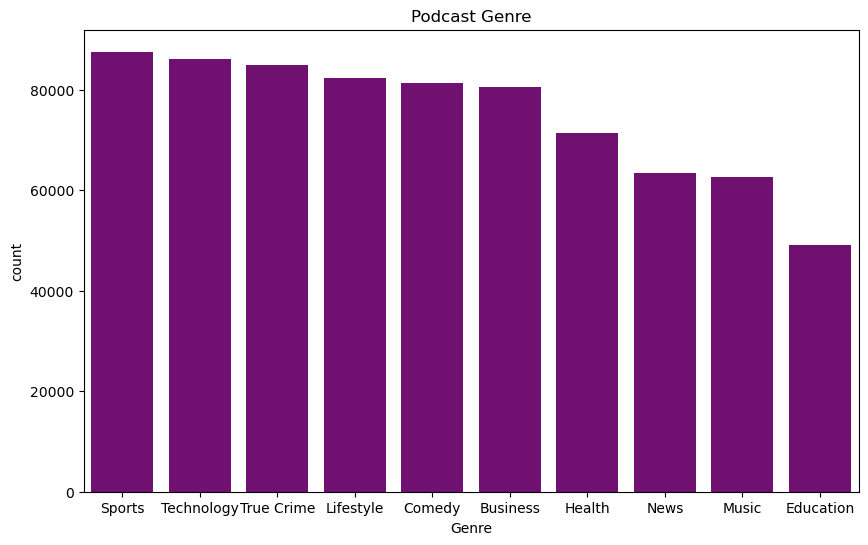

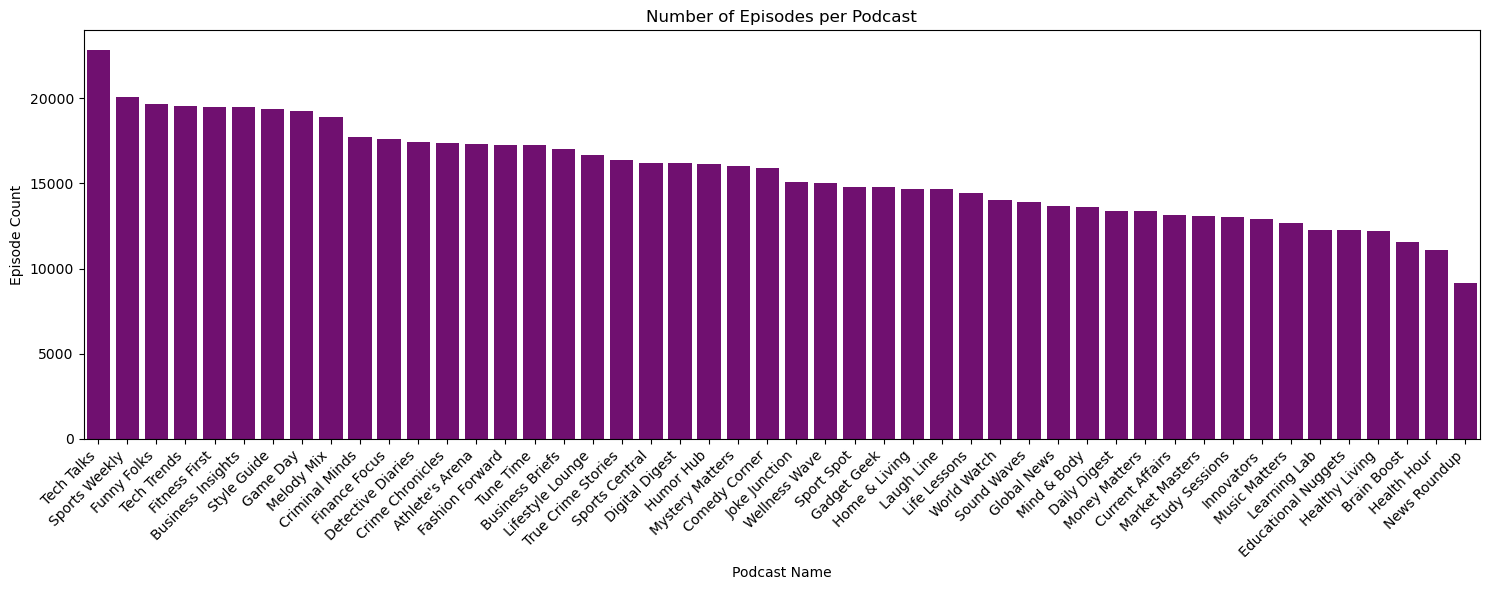

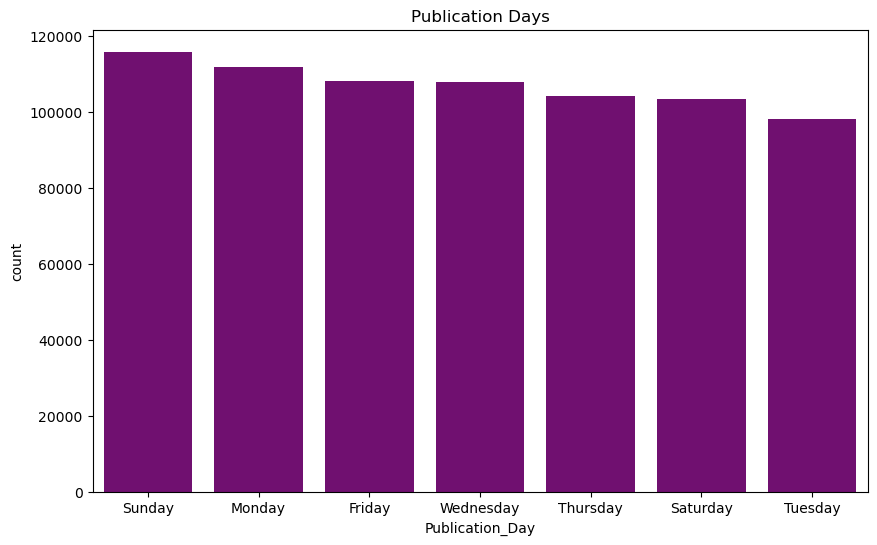

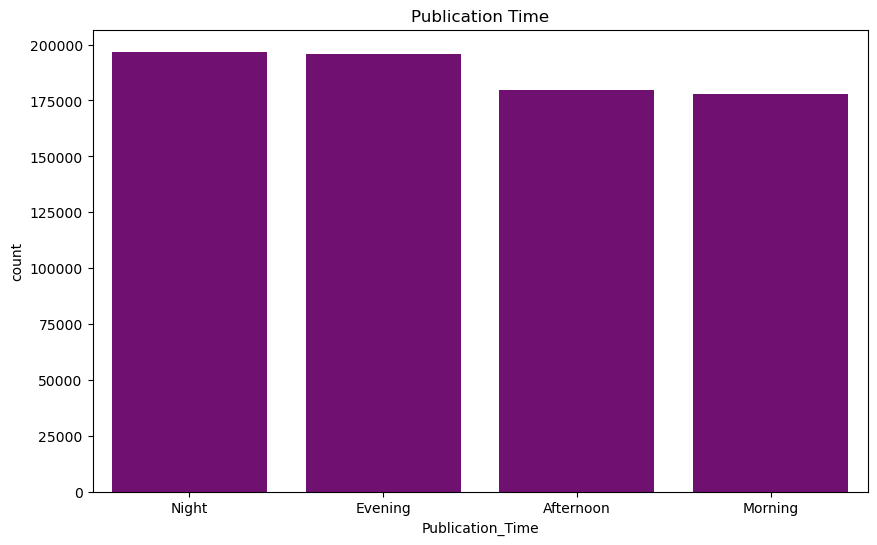

In [68]:
#Plot are bar graph with showing the various genres within the dataset
#Get the count of each Genre as a DataFrame
Genre_counts = df["Genre"].value_counts().reset_index()
Genre_counts.columns = ["Genre", "count"]

#Plot histogram of showing "topic" within dataset
plt.figure(figsize=(10,6))
sns.barplot(data = Genre_counts,x = "Genre",y ="count",color="purple")
plt.title("Podcast Genre",loc= "center")
plt.show()



#Use groupby to to find mean of Episode_Length_minutes 

episode_counts = df.groupby("Podcast_Name")["Episode_Title"].count().reset_index()
episode_counts.columns = ["Podcast_Name", "Episode_Count"]
episode_counts = episode_counts.sort_values("Episode_Count", ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(data =episode_counts,x = "Podcast_Name",y ="Episode_Count",color="purple")
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
plt.title("Number of Episodes per Podcast")
plt.xlabel("Podcast Name")
plt.ylabel("Episode Count")
plt.tight_layout()
plt.show()


#Get the count of each "Publication_Day" as a DataFrame
Pub_counts = df["Publication_Day"].value_counts().reset_index()
Pub_counts.columns = ["Publication_Day", "count"]

#Plot histogram of showing "Publication_Day" within dataset
plt.figure(figsize=(10,6))
sns.barplot(data = Pub_counts,x = "Publication_Day",y ="count",color="purple")
plt.title("Publication Days",loc= "center")
plt.show()

# Get the count of each "Publication_Time" as a DataFrame
Time_counts = df["Publication_Time"].value_counts().reset_index()
Time_counts.columns = ["Publication_Time", "count"]


#Plot histogram of showing "Publication_Times" within dataset
plt.figure(figsize=(10,6))
sns.barplot(data = Time_counts,x = "Publication_Time",y ="count",color="purple")
plt.title("Publication Time",loc= "center")
plt.show()

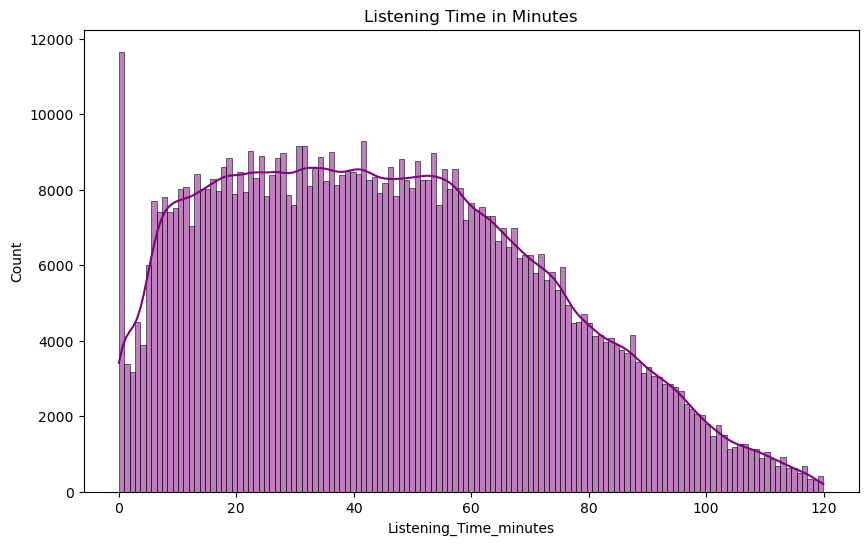

In [69]:
 # Plot histogram "
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "Listening_Time_minutes",kde=True,color="purple")
plt.title("Listening Time in Minutes",loc= "center")
plt.show()

**Left skewed**

In [70]:
df_Sent =df.value_counts("Episode_Sentiment")
df_Sent.to_frame()

,count
Episode_Sentiment,
Neutral,251291
Negative,250116
Positive,248593


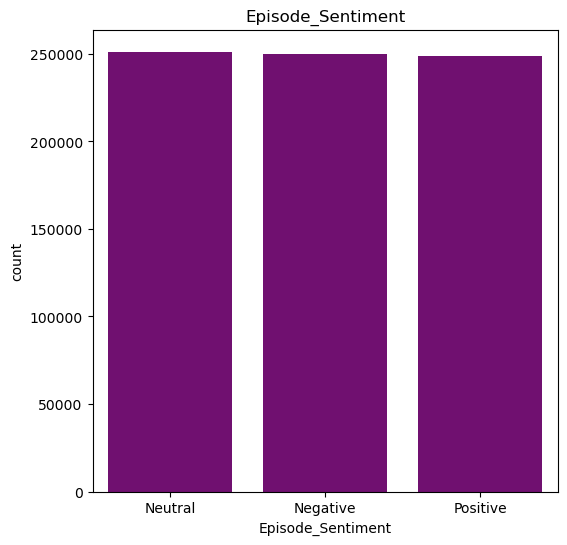

In [71]:
topic_counts = df["Episode_Sentiment"].value_counts().reset_index()
topic_counts.columns = ["Episode_Sentiment", "count"]

plt.figure(figsize=(6,6))
sns.barplot(data = topic_counts,x = "Episode_Sentiment",y ="count",color="purple")
plt.title("Episode_Sentiment",loc= "center")
plt.show()


**The episodes sentiment are relatively balanced**

## Bivariate Analysis

In [72]:
# seperate categorical and numerical features
Num =[['Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage','Number_of_Ads','Episode_Sentiment', 'Listening_Time_minutes']]
Cat =[['id','Podcast_Name','Episode_Title','Genre','Publication_Day',]]

Text(0, 0.5, 'Listening Time (minutes)')

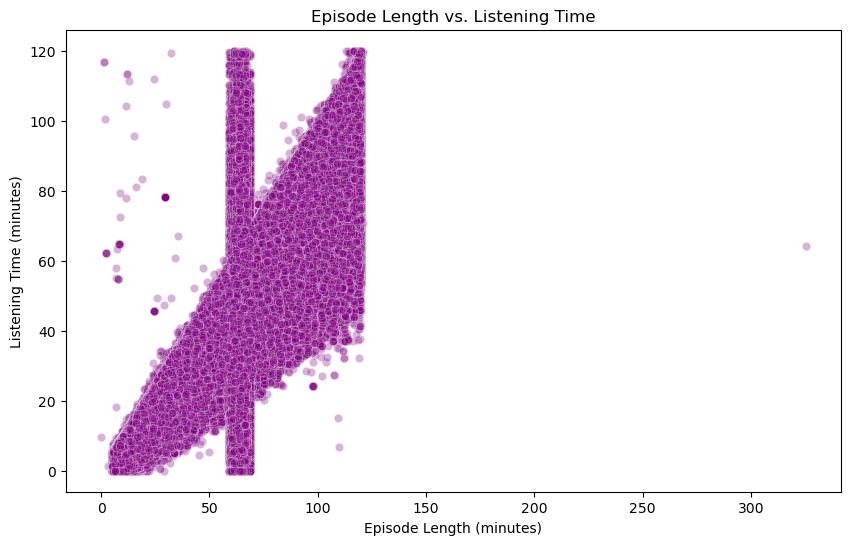

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Episode_Length_minutes", y="Listening_Time_minutes", color= "purple",alpha=0.3)
plt.title("Episode Length vs. Listening Time")
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Listening Time (minutes)")


/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_12444/2505876729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


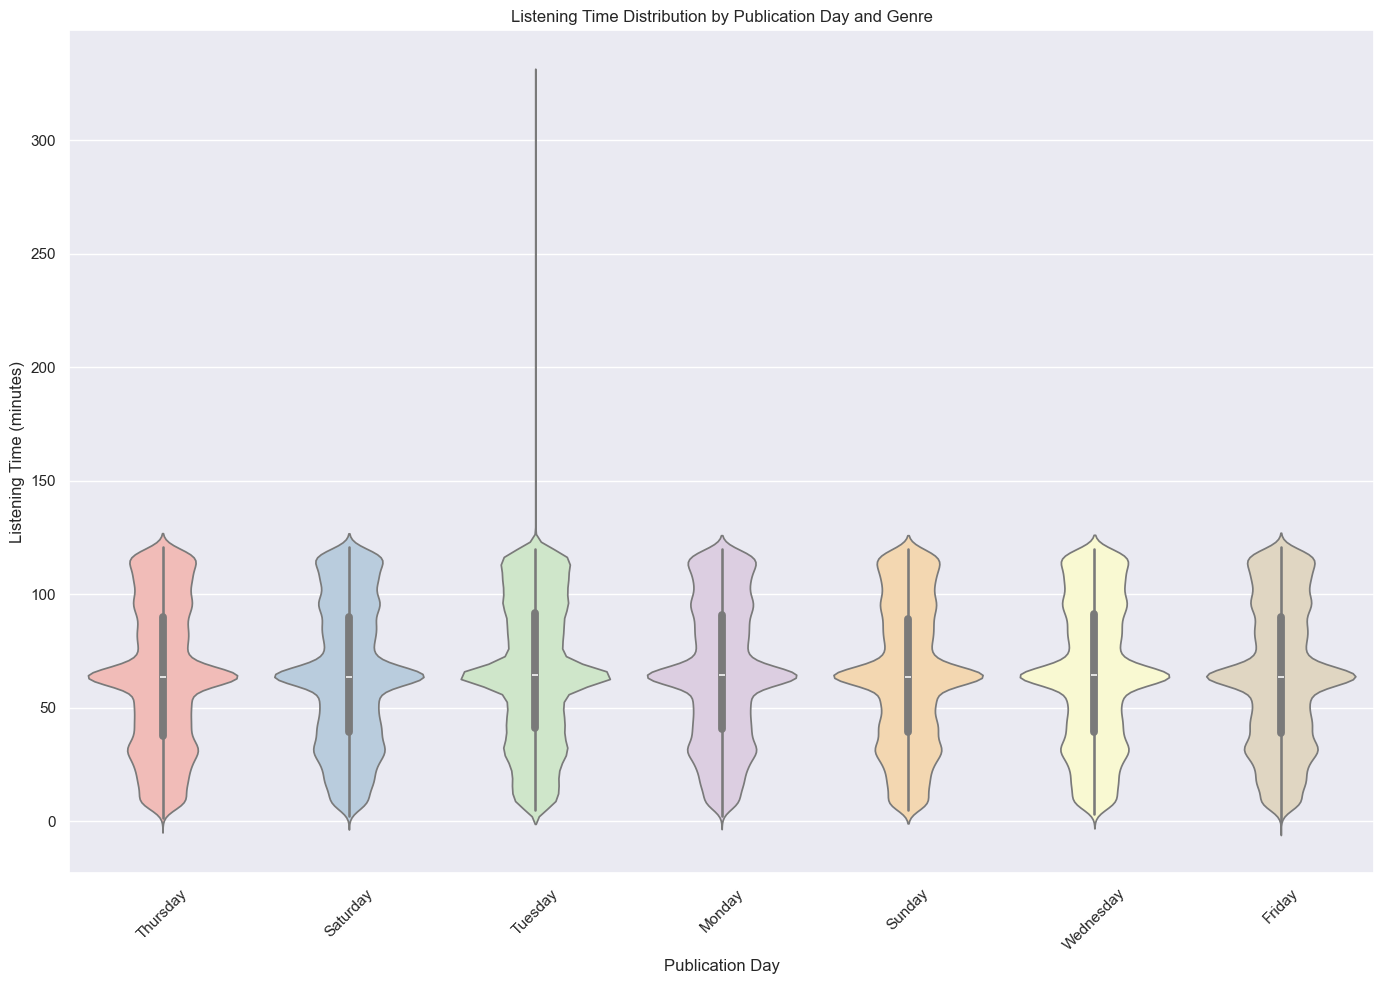

In [87]:
sns.set_theme(style="darkgrid")

# Grouped violin plot: Listening Time by Day, split by Genre
plt.figure(figsize=(14,10))
sns.violinplot(
    x="Publication_Day",
    y="Episode_Length_minutes",
    data=df,
    palette="Pastel1",
    split=False  # change to True if you want overlapping sides
)

plt.title("Listening Time Distribution by Publication Day and Genre")
plt.xlabel("Publication Day")
plt.ylabel("Listening Time (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

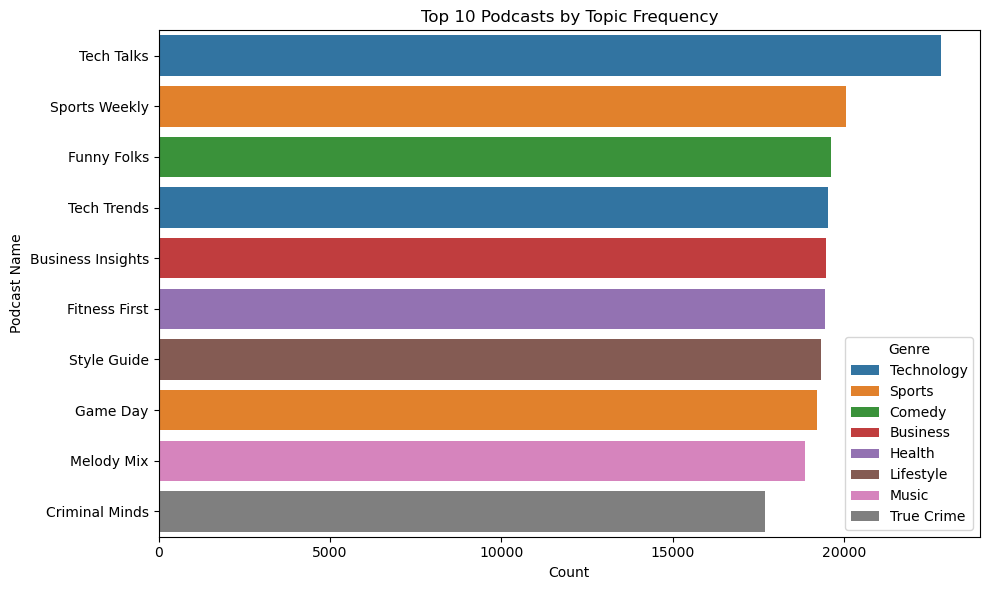

In [61]:
#use groupby for "genre"& "Podcast_Name"
Pod_genre_counts_df = df.groupby(["Genre", "Podcast_Name"]).size().reset_index(name='count')

top_podcasts = Pod_genre_counts_df.sort_values("count", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_podcasts, y="Podcast_Name", x="count", hue="Genre")
plt.title("Top 10 Podcasts by Topic Frequency")
plt.xlabel("Count")
plt.ylabel("Podcast Name")
plt.tight_layout()
plt.show()

## Multivariate Analysis


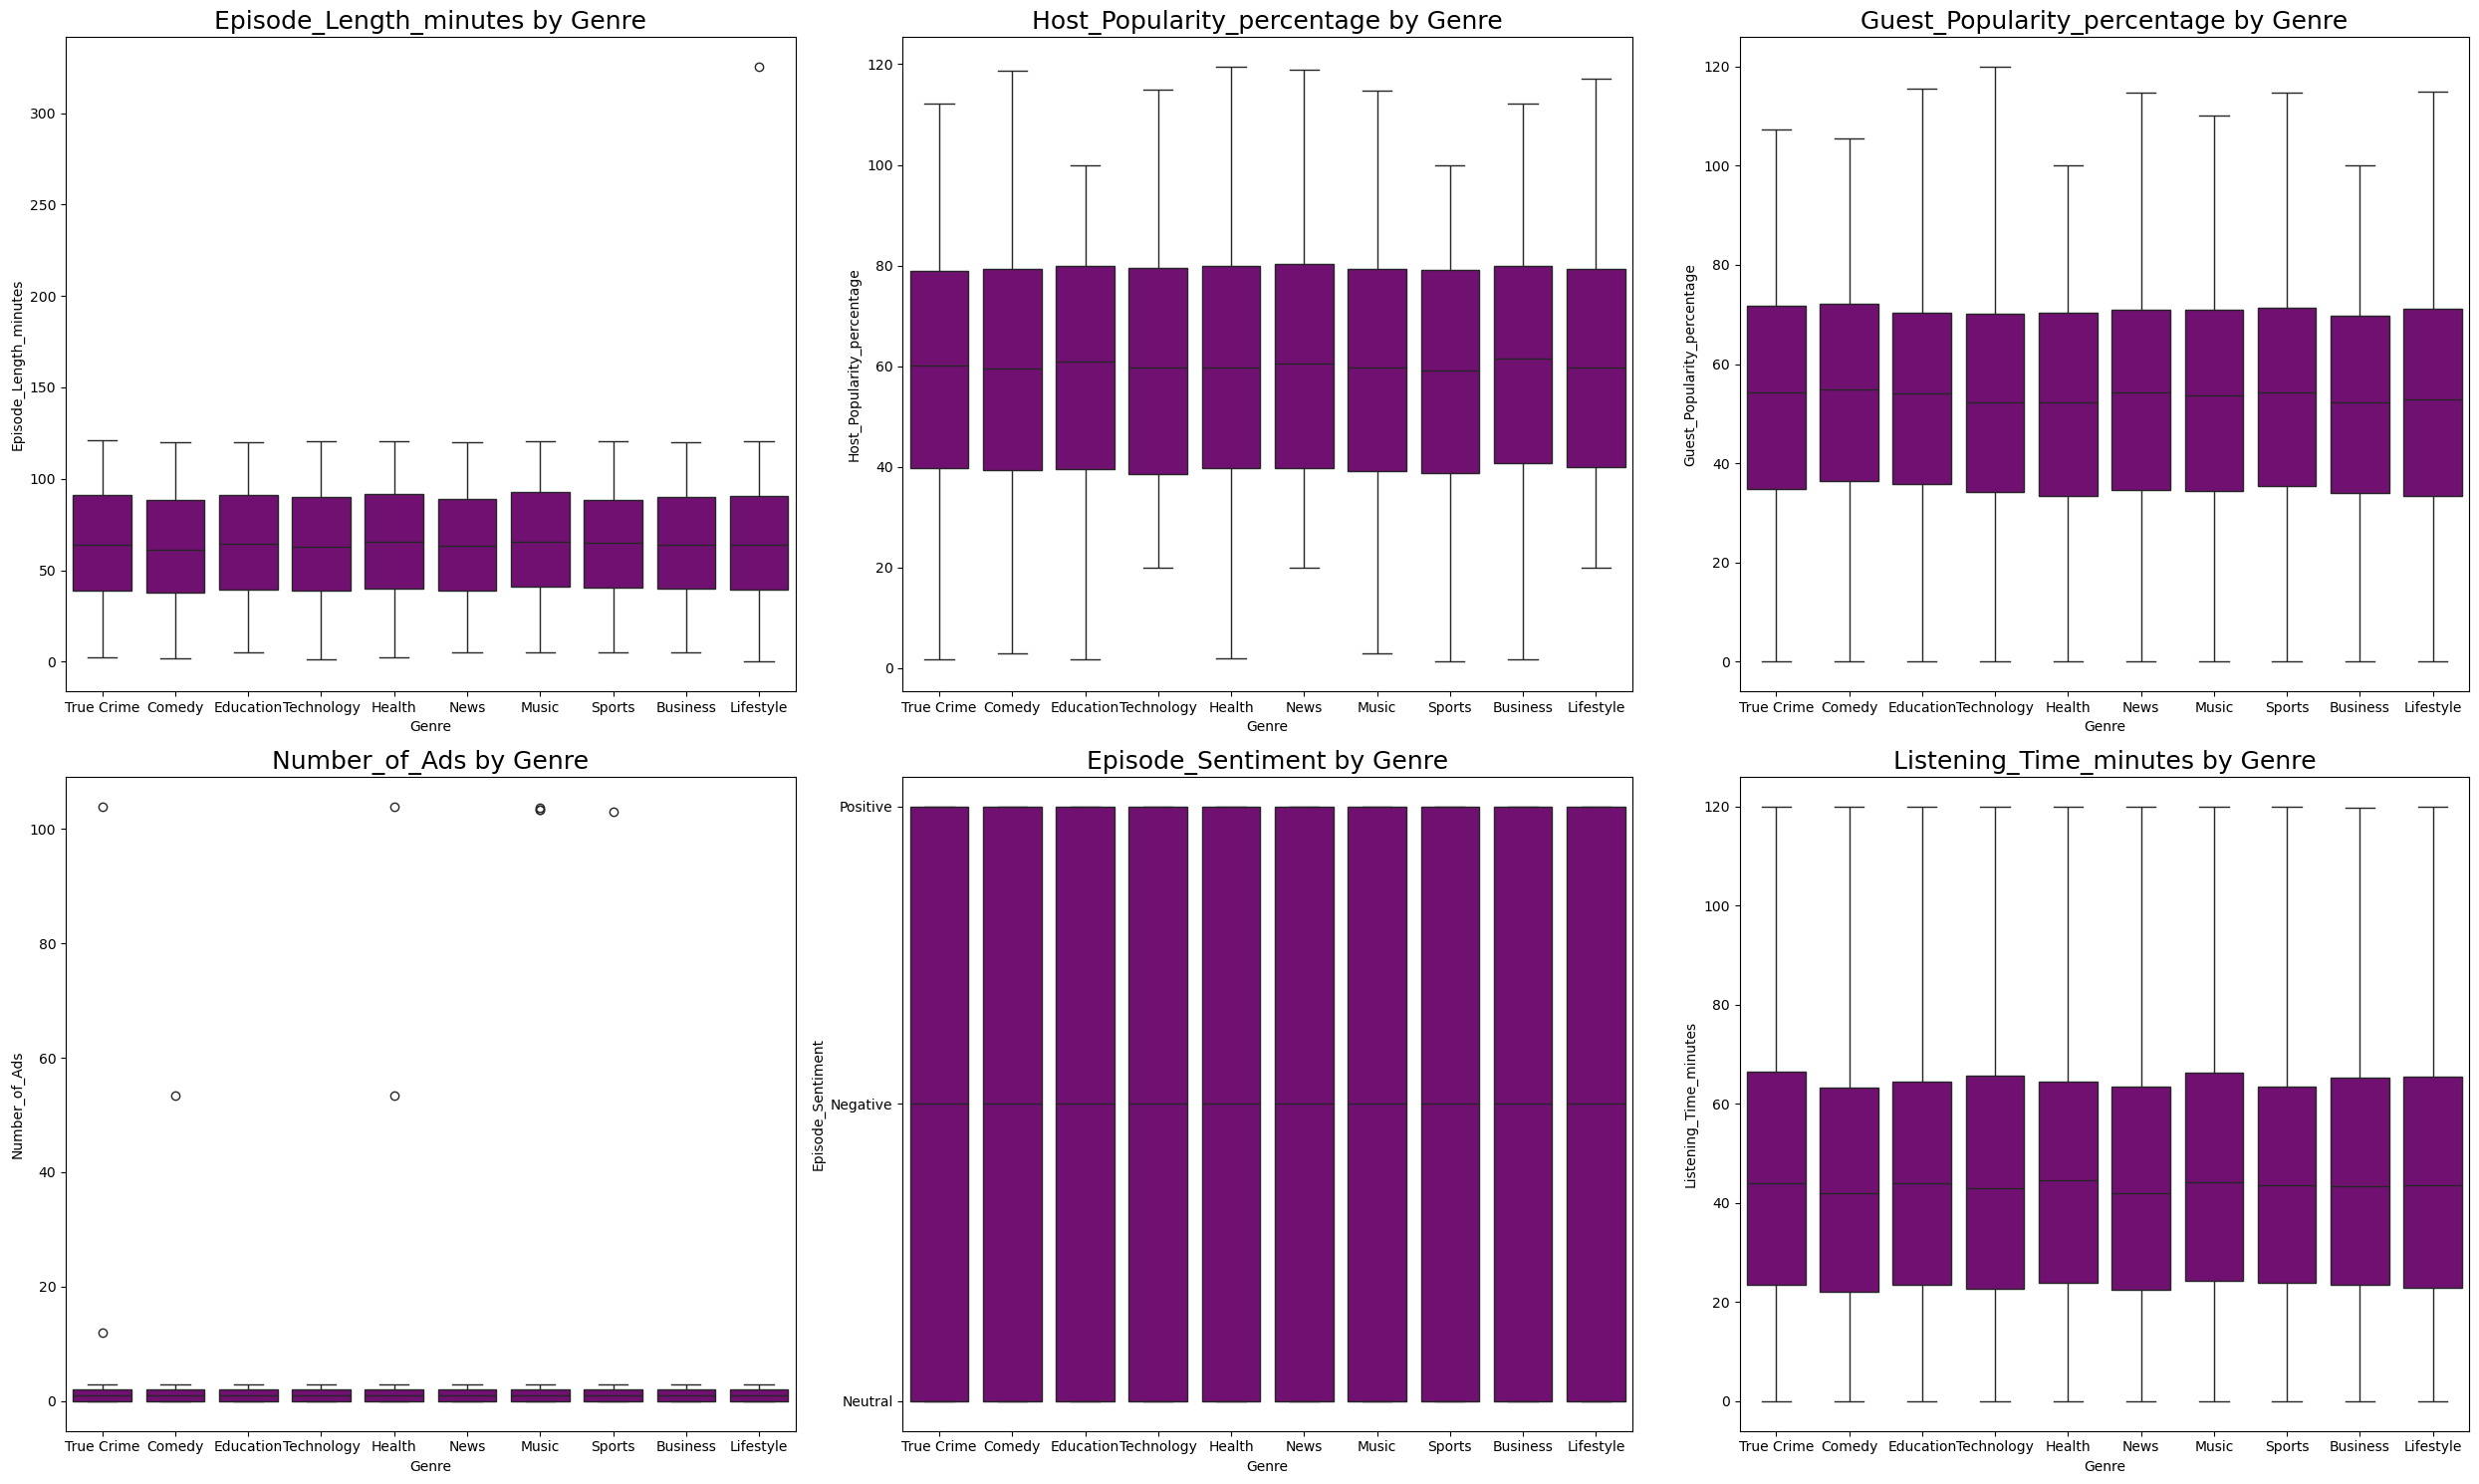

In [75]:
#Explore various feature vs “Genre” using lineplot 
numeric_features = [
    "Episode_Length_minutes", "Host_Popularity_percentage", 
    "Guest_Popularity_percentage", "Number_of_Ads", 
    "Episode_Sentiment", "Listening_Time_minutes"
]

fig, axes = plt.subplots(2, 3, figsize=(25, 15))  # 6 plots for 6 features

for idx, feature in enumerate(numeric_features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    sns.boxplot(data=df, x="Genre", y=feature, ax=ax,color="purple")
    ax.set_title(f"{feature} by Genre", fontsize=18)
    ax.set_xlabel("Genre")
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

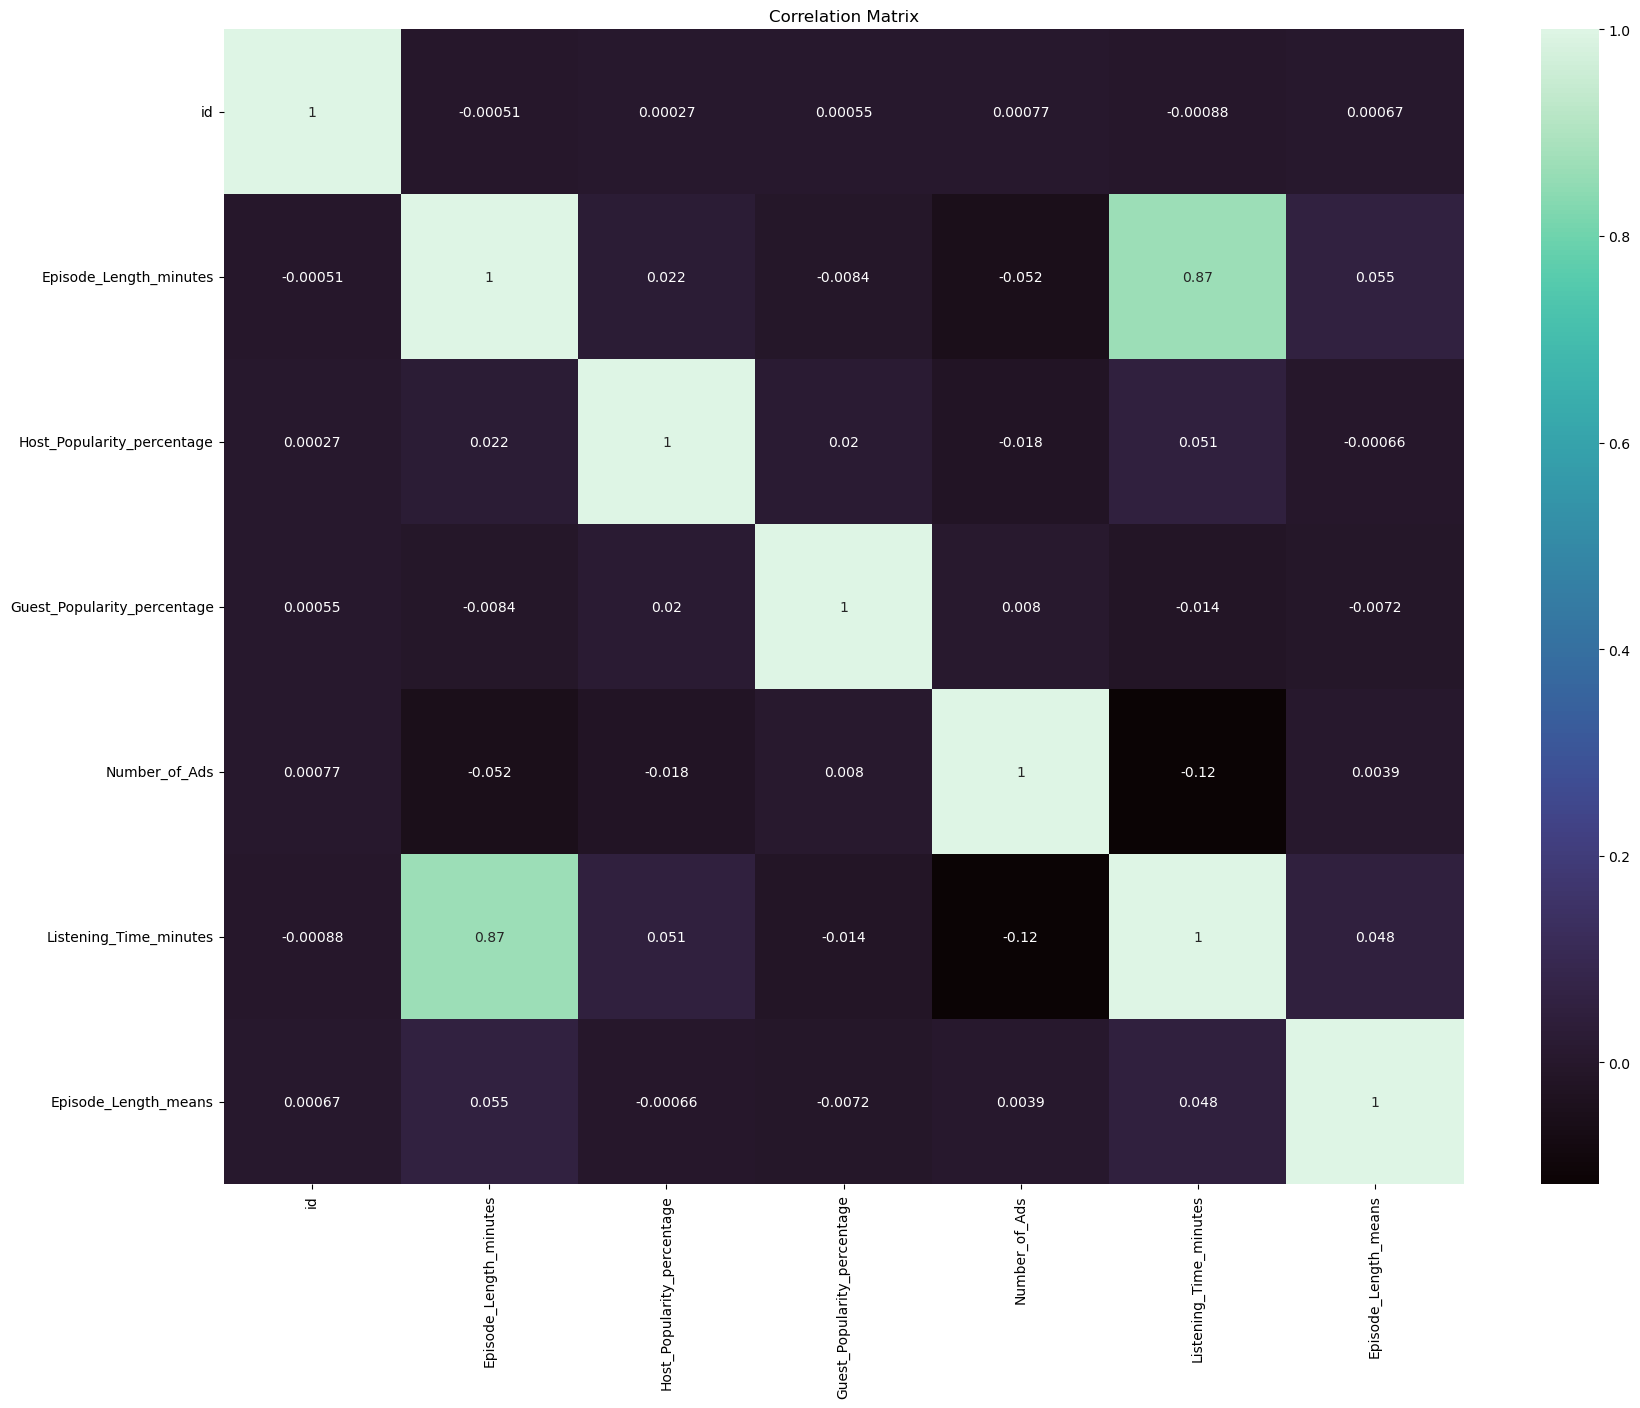

In [76]:
#Create a heatmap of all numberical variabes
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot= True, cmap = 'mako')
plt.title('Correlation Matrix')
plt.show
